In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_size = 128
n_classes = 10
epochs = 100

(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = mnist.load_data()

#データサイズ確認
print('x_train: {}'.format(raw_x_train.shape))
print('y_train: {}'.format(raw_y_train.shape))
print('x_test: {}'.format(raw_x_test.shape))
print('y_test: {}'.format(raw_y_test.shape))

#１次元にreshape
x_train = raw_x_train.reshape(60000, 28*28)
print('reshape x_train:', x_train.shape)
x_test = raw_x_test.reshape(-1, 28*28)
print('reshape x_test:', x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
reshape x_train: (60000, 784)
reshape x_test: (10000, 784)


label値= 5


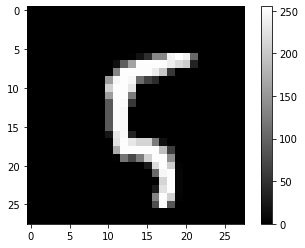

In [4]:
#データの可視化
plt.imshow(raw_x_train[100], cmap='gray')
plt.colorbar()

#対応のラベル値
print('label値=', raw_y_train[100])

In [6]:
#[0.0, 1.0]に値域の変換
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#カテゴリカル値
y_train = keras.utils.to_categorical(raw_y_train, n_classes)
y_test = keras.utils.to_categorical(raw_y_test, n_classes)

print(raw_y_train[100])
print(y_train[100])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


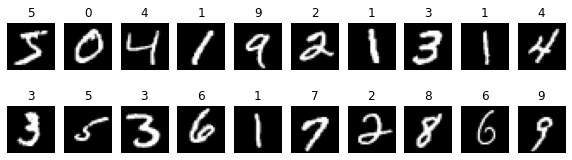

In [9]:
%matplotlib inline
plt.figure(figsize=(10,15))

for i in range(20):
  plt.subplot(10, 10, i+1, xticks=[], yticks=[])
  plt.title(y_train[i].argmax())
  plt.axis('off')
  plt.imshow(x_train[i].reshape((28,28)), cmap='gray')

In [10]:
#Deep learning
from keras.layers.core import Activation, Flatten
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 1.3033 - accuracy: 0.6642 - val_loss: 0.7105 - val_accuracy: 0.8380
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.8516 - val_loss: 0.4854 - val_accuracy: 0.8777
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.8764 - val_loss: 0.4084 - val_accuracy: 0.8940
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.8878 - val_loss: 0.3678 - val_accuracy: 0.9012
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8953 - val_loss: 0.3420 - val_accuracy: 0.9061
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.9010 - val_loss: 0.3248 - val_accuracy: 0.9128
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.9053 - val_loss: 0.3116 - val_accuracy: 0.9144

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'accuracy')

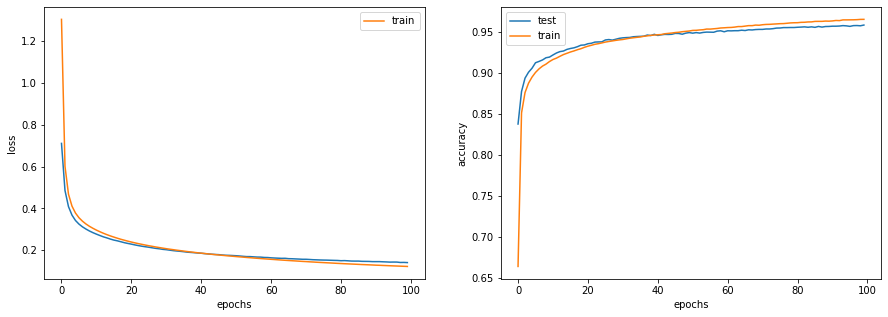

In [15]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')